## A simple classification task with k nearest neighbor (k-NN) classifier

- Read and run each cell of the given example

- Understand the results

### Import required modules

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "knn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Confusion matrix plot function

In [2]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Load data file

In [3]:
fruits = pd.read_csv('./data/fruit_data_with_colors.txt', sep='\t', engine='python')

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

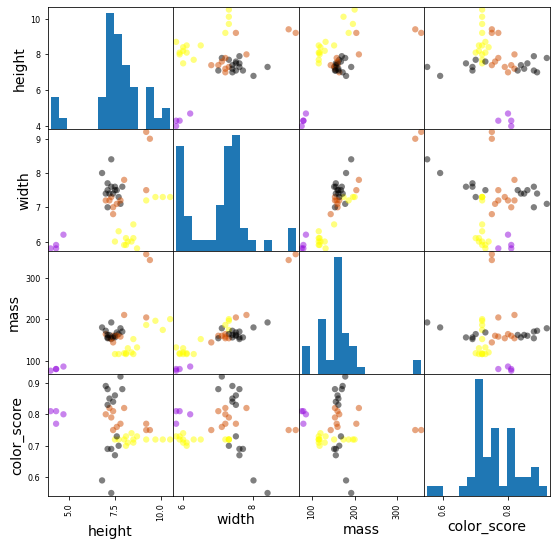

In [5]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

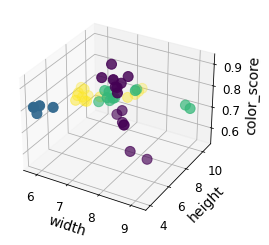

In [6]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create a KNN model and train it

K Nearest Neighbor classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

- Train the classifier (fit the estimator) using the training data¶

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [9]:
knn.score(X_test, y_test)

0.5333333333333333

#### Predict y values

In [10]:
y_pred = knn.predict(X_test)
y_pred

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4], dtype=int64)

### Performance
- Confusion matrix and plotting 
- Performance results with k = 5

In [11]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

correct = confusion_mat[0, 0]+confusion_mat[1, 1]+confusion_mat[2,2]+confusion_mat[3,3]
print('accuracy: ', correct/confusion_mat.sum())
#plot_confusion_matrix(confusion_mat, 4)


# Print classification report
target_names = ['apple', 'mandarin', 'orange', 'lemon']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

metrics_dict = classification_report(y_test, y_pred, 
                            target_names=target_names, output_dict=True)
    
print('precision (weighted):', metrics_dict['weighted avg']['precision'])
print('recall avg (weighted):', metrics_dict['weighted avg']['recall'])
print('accuracy: ', metrics_dict['accuracy'])

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
accuracy:  0.5333333333333333
              precision    recall  f1-score   support

       apple       0.50      0.75      0.60         4
    mandarin       1.00      1.00      1.00         1
      orange       0.75      0.38      0.50         8
       lemon       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15

precision (weighted): 0.6333333333333333
recall avg (weighted): 0.5333333333333333
accuracy:  0.5333333333333333


### Use the trained k-NN classifier model to classify new, previously unseen data

In [12]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

## Optimizing parameters and improvement in k-NN classifier 

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

- Conduct the classification modling (training/testing) using different k values, k = 1, 2, 3, .., 20

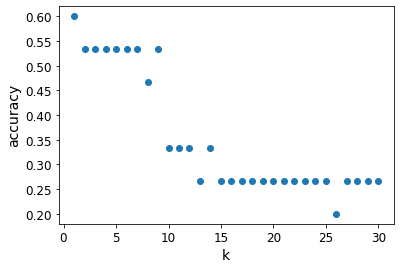

In [14]:
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30]);


- Conduct the classification modling (training/testing) using different k values, k = 1, 5, 15, 20

In [15]:
k_value = [1, 5, 15, 20, 25, 30]

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}")
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    # Print classification report
    target_names = ['apple', 'mandarin', 'orange', 'lemon']
   
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    print(result_metrics)

k=1
[[2 0 2 0]
 [0 1 0 0]
 [3 0 5 0]
 [0 0 1 1]]
              precision    recall  f1-score   support

       apple       0.40      0.50      0.44         4
    mandarin       1.00      1.00      1.00         1
      orange       0.62      0.62      0.62         8
       lemon       1.00      0.50      0.67         2

    accuracy                           0.60        15
   macro avg       0.76      0.66      0.68        15
weighted avg       0.64      0.60      0.61        15

k=5
[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

       apple       0.50      0.75      0.60         4
    mandarin       1.00      1.00      1.00         1
      orange       0.75      0.38      0.50         8
       lemon       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15

k=15
[[4 0 0 0]
 [0 0 0 1]
 [8 0

C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metr

### How sensitive is k-NN classification accuracy to the train/test split proportion?

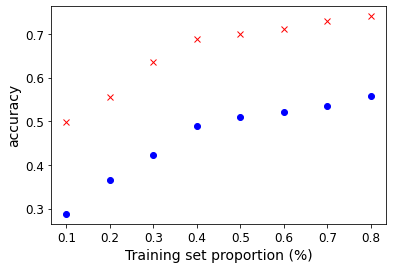

In [16]:
t = [x/10 for x in range(1, 9)]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        train_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(train_score), 'rx')    
    plt.plot(s, np.mean(test_score), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### K Cross Validation

- Conduct 3-cross-validation on this dataset using the best k value you have found in Task 1
- Print the performance result of each cross-validation

In [17]:
from sklearn.model_selection import KFold # import k-fold validation

# create k-fold validation
kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds

In [18]:
# change DataFrame to numpy array
XX = X.to_numpy()

knn = KNeighborsClassifier(n_neighbors = 3)

precision_sum = recall_sum = accuracy_sum = 0

for train_index, test_index in kf.split(XX):
    X_train, X_test = XX[train_index], XX[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    result_metrics_dict = classification_report(y_test, y_pred, output_dict=True)
    
    precision_sum += result_metrics_dict["weighted avg"]["precision"]
    recall_sum += result_metrics_dict["weighted avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]

print("Avg precision (weighted):", precision_sum/kf.get_n_splits(X))
print("Avg recall (weighted):", recall_sum/kf.get_n_splits(X))
print("Accuracy:", accuracy_sum/kf.get_n_splits(X))

Avg precision (weighted): 0.5641166216824112
Avg recall (weighted): 0.5596491228070176
Accuracy: 0.5596491228070176


C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improvement through attribute normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=2)

fruits = pd.read_csv('./data/fruit_data_with_colors.txt', sep='\t', engine='python')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Performance results after attribute normalization

In [20]:
knn.score(X_test_scaled, y_test)

1.0

In [21]:
y_pred = knn.predict(X_test_scaled)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]


In [22]:
# Print classification report
target_names = ['apple', 'mandarin', 'orange', 'lemon']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      1.00      1.00         8
       lemon       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Visualization of K-NN classifier
### Synthetic dataset for binary classification

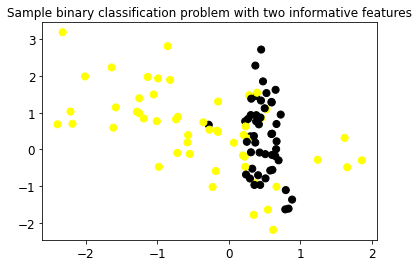

In [23]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

### Results using varying k values

C:\Users\Lucas\OneDrive\Documents\GitHub\CPSC4310_Assignments\Examples\EX6_kNN\EX6_kNN\adspy_shared_utilities.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


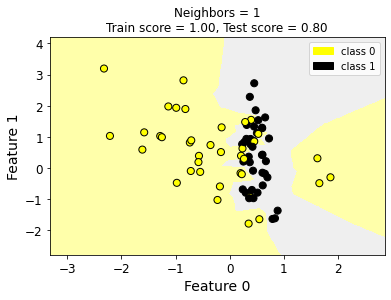

C:\Users\Lucas\OneDrive\Documents\GitHub\CPSC4310_Assignments\Examples\EX6_kNN\EX6_kNN\adspy_shared_utilities.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


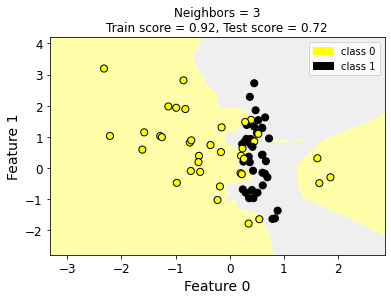

C:\Users\Lucas\OneDrive\Documents\GitHub\CPSC4310_Assignments\Examples\EX6_kNN\EX6_kNN\adspy_shared_utilities.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


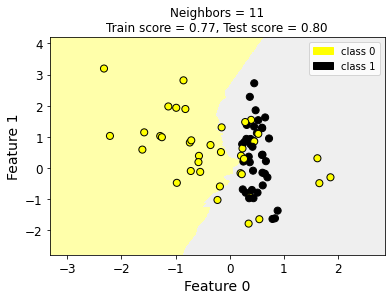

In [24]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)